In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

labels = [
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.8,
    0.9,
    1,
    1.1,
    1.2,
    1.3,
    1.4,
    1.5,
    1.6,
    1.7,
    1.8,
    1.9,
    2,
    2.1,
    2.2,
    2.3,
    2.4,
    2.5,
    2.6,
    2.7,
    2.8,
    2.9,
    3,
]
df = []
masses = []

for label in labels:
    masses += [label]
    df += [pd.read_csv(f"{label}.data", sep="\s+")]
masses = np.array(masses)

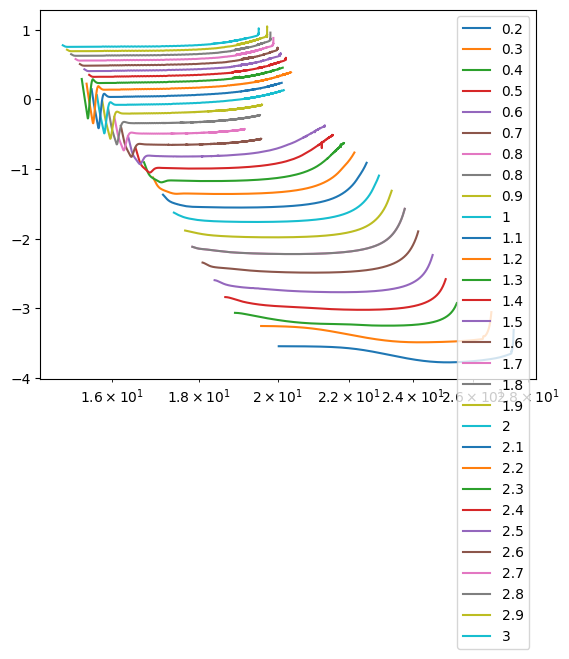

In [3]:
ages = []
lums = []

for d in df:
    condition = 10 * d["log_LH"] > 1 * 10 * d["log_L"]
    if condition.any():
        start_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        start_h_burning = None

    condition = d["center_h1"] < 1e-6
    if condition.any():
        end_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        end_h_burning = None

    d = d[(d["star_age"] > start_h_burning) & (d["star_age"] < end_h_burning)]

    ages += [d["star_age"]]
    lums += [d["log_Lneu"]]

min_length = min(len(lum) for lum in lums)
ages = np.log([age[:min_length] for age in ages])
lums = np.array([lum[:min_length] for lum in lums])

for a, l, label in zip(ages, lums, labels):
    plt.plot(a, l, label=label)
plt.legend()
plt.xscale('log')
